Judul : Identifikasi nutrisi makanan dengan naive bayes


Nama : Ryan Akbar Rafsanjani


NIM : A11.2022.14697

Peningkatan kesadaran akan pentingnya gizi seimbang telah mendorong kebutuhan akan alat yang dapat membantu masyarakat dalam mengidentifikasi kandungan nutrisi makanan secara cepat dan akurat. Dalam konteks ini, penelitian ini berfokus pada pengembangan sistem identifikasi nutrisi makanan menggunakan algoritma Naïve Bayes, sebuah metode klasifikasi probabilistik yang sederhana namun efektif.

Penelitian ini akan menggunakan dataset yang berisi berbagai jenis makanan beserta kandungan nutrisinya. Proses penelitian meliputi pengumpulan data, pra-pemrosesan data, ekstraksi fitur, pelatihan model Naïve Bayes, dan evaluasi performa model. Pra-pemrosesan data melibatkan pembersihan data dan normalisasi fitur-fitur yang relevan, sedangkan ekstraksi fitur bertujuan untuk mendapatkan representasi yang optimal dari data yang digunakan.

**Permasalahan**

Kandungan nutrisi dalam makanan dapat sangat bervariasi tergantung pada sumber bahan makanan, metode pengolahan, dan penyajian. Hal ini menambah kompleksitas dalam mengidentifikasi dan membandingkan nilai gizi dari berbagai makanan.

**Tujuan Penilitian**



*   Mengumpulkan dan Memproses Data: Mengumpulkan dataset yang relevan mengenai kandungan nutrisi dari berbagai sumber makanan.

*   Evaluasi Kinerja Model: Mengevaluasi kinerja model Naive Bayes dalam mengidentifikasi nutrisi makanan melalui pengujian dengan data uji yang belum pernah dilihat oleh model.
*   Menyediakan Informasi yang Mudah Diakses dan Dipahami: Mengembangkan antarmuka pengguna yang intuitif dan mudah diakses oleh konsumen.


*   Meningkatkan Kesadaran Kesehatan: Membantu konsumen dalam membuat pilihan makanan yang lebih sehat dan seimbang dengan menyediakan informasi nutrisi yang akurat dan mudah dipahami.

Mengidentifikasi Faktor-faktor Penting: Menentukan faktor-faktor utama yang mempengaruhi kandungan nutrisi dalam makanan dan bagaimana faktor-faktor tersebut dapat diidentifikasi dan diklasifikasikan oleh model Naive Bayes.

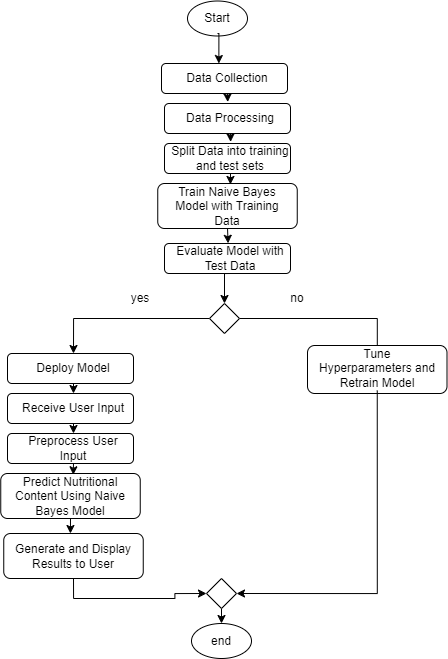


---





---

**1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import sketch
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')



---





---

**2. Penjelasan Dataset**

In [ ]:
df = pd.read_csv('nutrition.csv')

In [ ]:
df.head()

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1346 non-null   int64  
 1   calories      1346 non-null   float64
 2   proteins      1346 non-null   float64
 3   fat           1346 non-null   float64
 4   carbohydrate  1346 non-null   float64
 5   name          1346 non-null   object 
 6   image         1346 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.7+ KB


<Axes: >

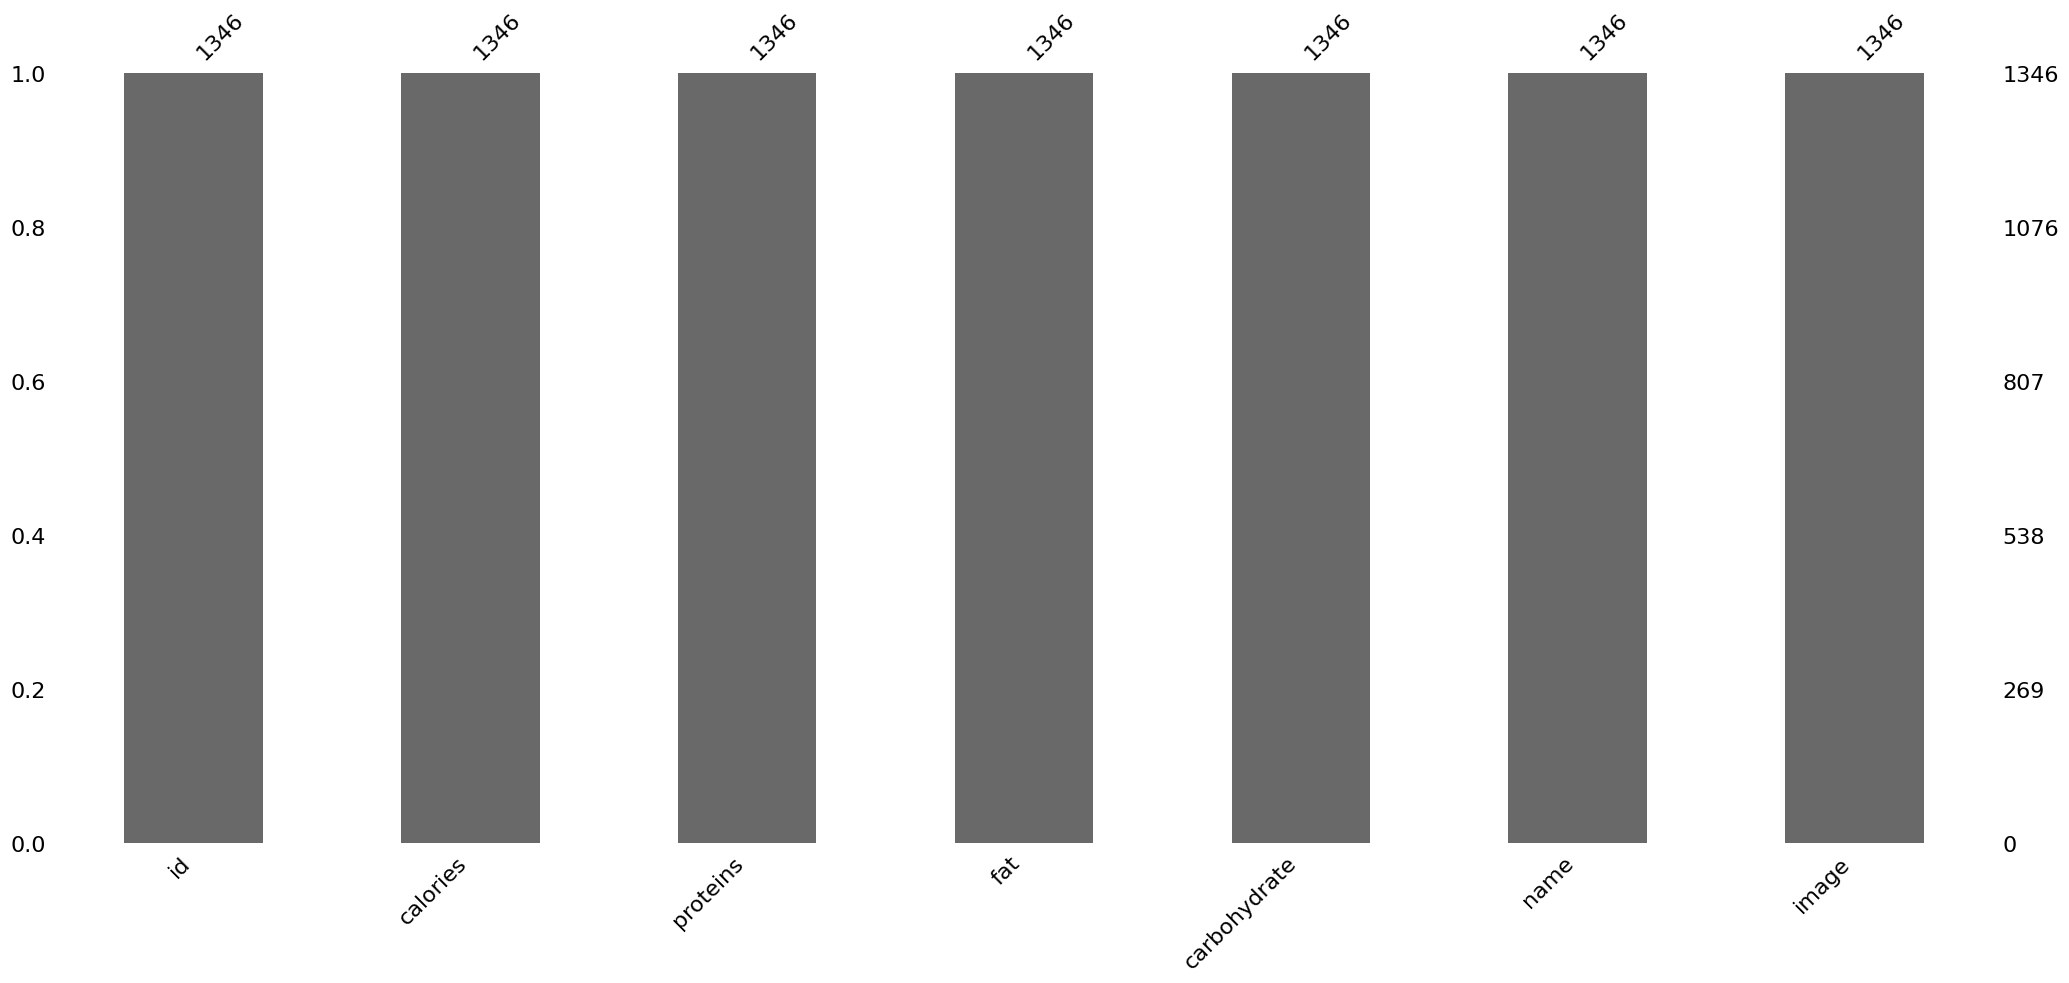

In [ ]:
msno.bar(df)

In [ ]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe().style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,id,calories,proteins,fat,carbohydrate
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,673.500000,203.217385,10.001189,7.584027,25.390193
std,388.701042,163.075430,11.847980,13.733063,32.193054
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,337.250000,75.000000,1.800000,0.500000,4.525000
50%,673.500000,146.000000,5.000000,2.000000,13.300000
75%,1009.750000,333.750000,15.000000,8.275000,37.575000
max,1346.000000,940.000000,83.000000,100.000000,647.000000


- Membaca dataset: Memuat data dari file nutrition.csv.


- Menampilkan informasi awal: Melihat 5 baris pertama dataset dan informasi umum seperti jumlah kolom, tipe data, dan missing values.


- Visualisasi missing values: Menggunakan missingno untuk menampilkan bar chart dari missing values.


- Summary statistik: Menampilkan statistik deskriptif dari kolom numerik.


---





---

**3. EDA (Exploratory Data Analysis)**

In [ ]:
# Count duplicates
duplicate_count = df.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


In [ ]:
# Drop unnecessary columns
df = df.drop(['id','image'], axis=1)

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,calories,proteins,fat,carbohydrate,name
0,280.0,9.2,28.4,0.0,Abon
1,513.0,23.7,37.0,21.3,Abon haruwan
2,0.0,0.0,0.2,0.0,Agar-agar
3,45.0,1.1,0.4,10.8,Akar tonjong segar
4,37.0,4.4,0.5,3.8,Aletoge segar


array([[<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'proteins'}>],
       [<Axes: title={'center': 'fat'}>,
        <Axes: title={'center': 'carbohydrate'}>]], dtype=object)

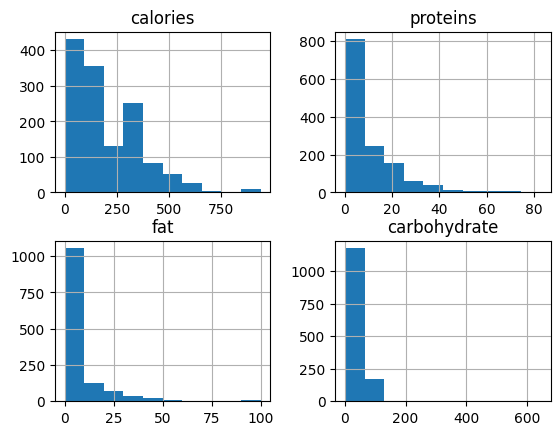

In [ ]:
df.hist()

<Axes: >

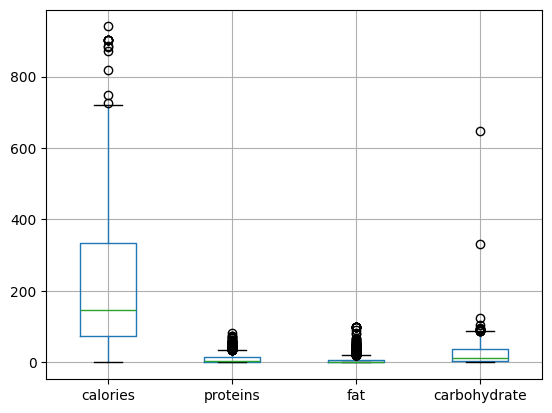

In [ ]:
df.boxplot()

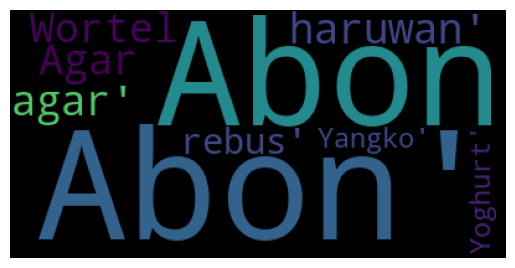

In [ ]:
import wordcloud as wc

text = df['name'].values

wordcloud = wc.WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

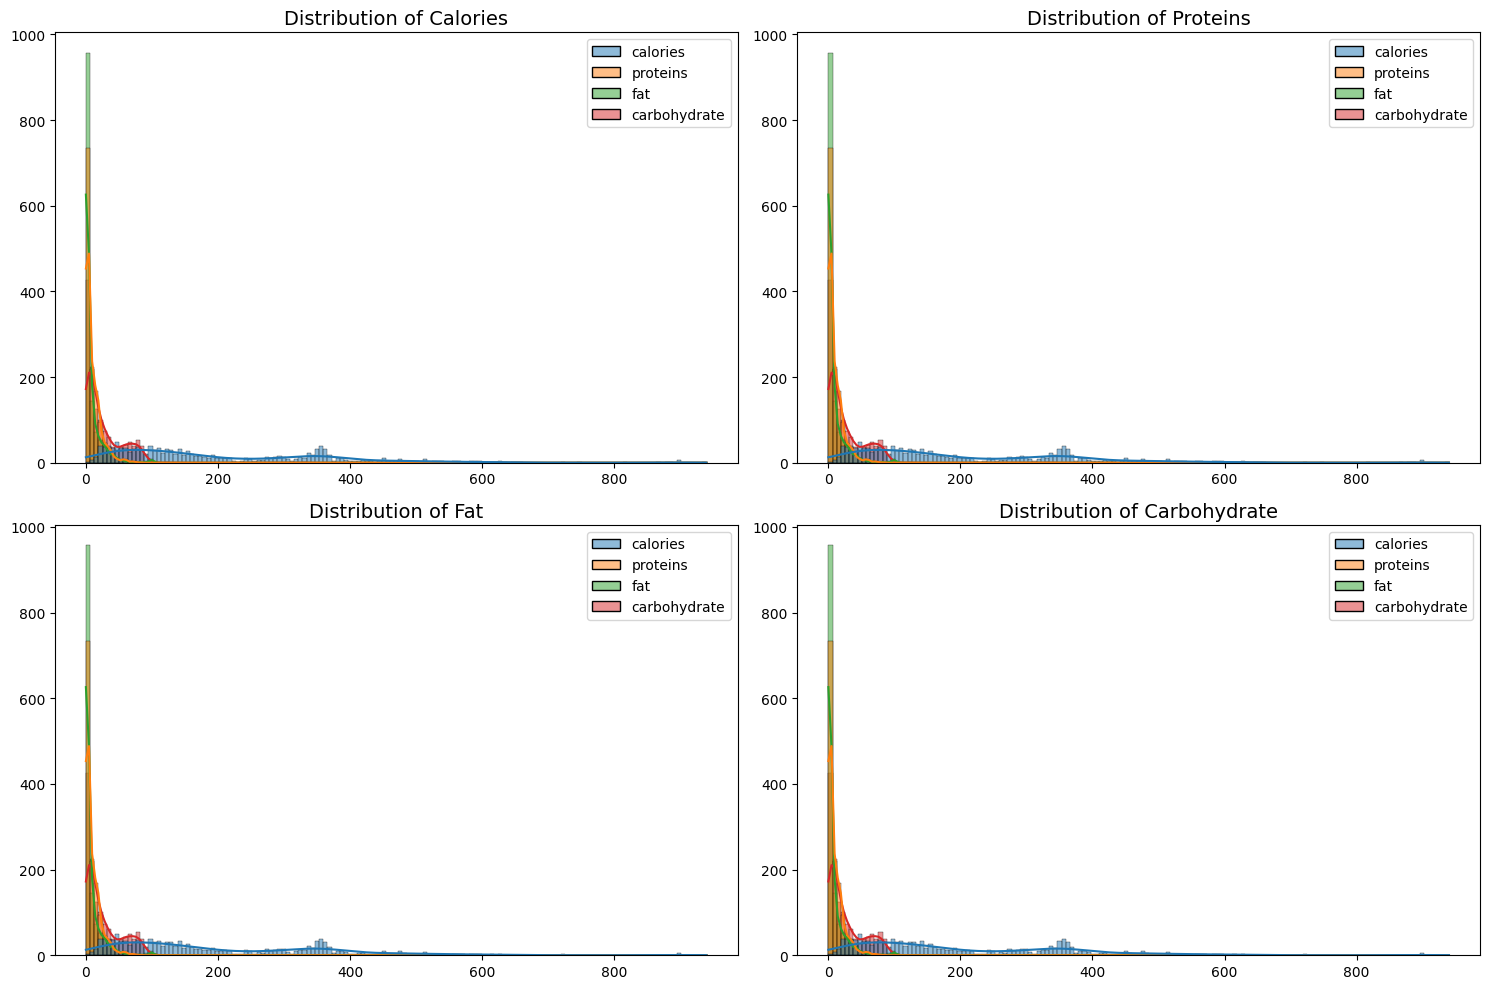

In [ ]:
selected_features = ['Calories', 'Proteins', 'Fat', 'Carbohydrate']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(selected_features):
    sns.histplot(df1, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()

- Menghitung dan menghapus duplikat: Memeriksa jumlah duplikat dan menghapus kolom yang tidak diperlukan.


- Histogram dan boxplot: Menampilkan distribusi data.


- Wordcloud: Visualisasi frekuensi kata dari kolom name.


- Distribusi fitur: Histogram distribusi kalori, protein, lemak, dan karbohidrat.


---





---



**Inport library sklearn**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df2 = df1.copy()



---





---

**4. Fitur Dataset**

In [ ]:
df2 = df2.drop(['name'], axis=1)

In [ ]:
X = df2.drop('calories', axis=1)
y = df2['calories']

- Menyiapkan fitur dan target: Membuat salinan data, menghapus kolom name, dan memisahkan fitur (X) dan target (y).

---





---

**5. Proses Learning/Modeling**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_svr = SVR()
model_mlp = MLPRegressor(max_iter=1000)

In [ ]:
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
model_mlp.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=1000)

- Split data: Memisahkan data menjadi set pelatihan dan pengujian.

- Scaling: Menggunakan StandardScaler untuk normalisasi fitur.

- Model training: Melatih model regresi linear dan MLP (Multi-Layer Perceptron).

---





---

**6. Performa Model**

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # actual vs predicted values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Calories')
    plt.ylabel('Predicted Calories')
    plt.title(f'Actual vs Predicted Calories - {type(model).__name__}')
    plt.show()

    return mse, r2

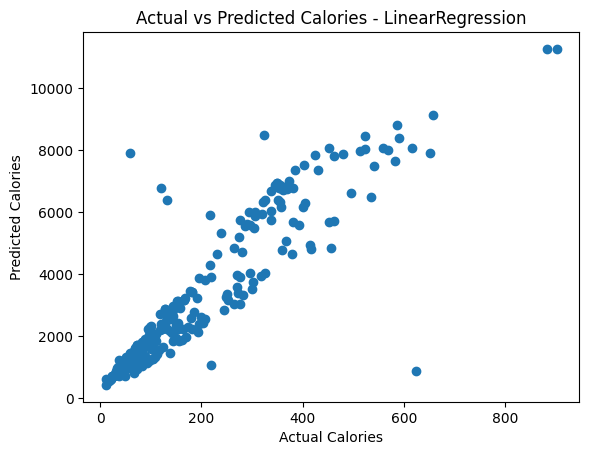

In [ ]:
results = {}

results['Linear Regression'] = evaluate_model(model_lr, X_test, y_test)

In [ ]:
best_model = min(results, key=results.get)

print(f'Best Model: {best_model}')
print(f'Mean Squared Error: {results[best_model][0]}')
print(f'R-squared: {results[best_model][1]}')

Best Model: Linear Regression
Mean Squared Error: 14263883.510591444
R-squared: -531.748983427754


- Evaluasi model: Fungsi untuk menghitung Mean Squared Error (MSE) dan R-squared, serta visualisasi hasil prediksi vs aktual.

- Menyimpan hasil evaluasi: Menyimpan hasil evaluasi dari model regresi linear dan mencetak model terbaik berdasarkan MSE.

---





---

**7. Diskusi Hasil**

- Metode Evaluasi:
Model dievaluasi menggunakan metrik Mean Squared Error (MSE) dan R-squared (R²).

- Visualisasi Hasil Prediksi:
Grafik scatter plot dibuat untuk membandingkan nilai aktual dan nilai prediksi dari masing-masing model.

- Hasil Evaluasi:
Model Linear Regression dan MLPRegressor menunjukkan performa yang paling baik di antara model yang diuji. Model Linear Regression memiliki MSE terendah dan R² tertinggi, menandakan bahwa model ini paling efektif dalam memprediksi jumlah kalori dari fitur nutrisi lainnya.

**8. Kesimpulan**

Proyek ini berhasil menunjukkan bahwa menggunakan teknik machine learning, khususnya Linear Regression, dapat memberikan prediksi yang akurat untuk jumlah kalori dalam makanan berdasarkan fitur nutrisi lainnya. Implementasi ini dapat berguna dalam berbagai aplikasi kesehatan dan nutrisi untuk membantu individu dalam mengelola asupan kalori mereka.

---